## **Importing Libraries and Perform EDA**

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

### Understanding the Basics of Loading and Verifying Data 
This step involves utilizing pandas, to structure information extracted from files named 'pendigits.tra' and 'pendigits.tes'. Initially, different segments of the data are labeled. Subsequently, pandas converts this data into a structured table known as a DataFrame. By using print(train_df.head()), We are getting a brief review of the initial rows of the DataFrame. This method simplifies complex data into a structured format for improved comprehension.

In [29]:
import pandas as pd

# Assuming 'pendigits.tra' is in the current directory
train_file = 'pendigits.tra'

# Define column names based on your data description
column_names = ['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
                'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
                'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15',
                'Attribute16', 'Class']

# Load the training data
train_df = pd.read_csv(train_file, header=None, names=column_names)

# Display the first few rows to verify the data
print(train_df.head())

test_file = 'pendigits.tes'

# Load the testing data with the same column names
test_df = pd.read_csv(test_file, header=None, names=column_names)

# Display the first few rows of test_df to verify the data
print(test_df.head())



   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0          47         100          27          81          57          37   
1           0          89          27         100          42          75   
2           0          57          31          68          72          90   
3           0         100           7          92           5          68   
4           0          67          49          83         100         100   

   Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  Attribute12  \
0          26           0           0           23           56           53   
1          29          45          15           15           37            0   
2         100         100          76           75           50           51   
3          19          45          86           34          100           45   
4          81          80          60           60           40           40   

   Attribute13  Attribute14  Attribute15  Attribute16  C

## **Predicting Model**

### Preparing Data for Machine Learning Models

This code splits the data into features (X) and target (y) variables for both the training and testing datasets:

For training:

- `X_train`: Features without the 'Class' column.
- `y_train`: Target variable from the 'Class' column.

For testing:

- `X_test`: Features without the 'Class' column.
- `y_test`: Target variable from the 'Class' column.

These splits prepare the data for training and evaluating machine learning models.


In [ ]:
# Split features (X) and target (y) for training data
X_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']

# Split features (X) and target (y) for testing data
X_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

Using PyCaret, a Python library for simplified machine learning workflows. 

The `setup()` function initializes the PyCaret environment with our training data (`train_df`) and specifies the target variable ('Class') for classificatione stinget a session ID for reproducibility. 

The `compare_models()` function compares the performance of different machine learning models and selects the best-performing one.


In [6]:
from pycaret.classification import *

# Setup PyCaret with full dataset
clf1 = setup(data=train_df, target='Class', session_id=42)

# Compare Models
best_model = compare_models()


,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Multiclass
3,Original data shape,"(7494, 17)"
4,Transformed data shape,"(7494, 17)"
5,Transformed train set shape,"(5245, 17)"
6,Transformed test set shape,"(2249, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9939,0.9997,0.9939,0.9940,0.9939,0.9932,0.9932,0.3310
knn,K Neighbors Classifier,0.9912,0.9993,0.9912,0.9914,0.9912,0.9903,0.9903,0.1080
lightgbm,Light Gradient Boosting Machine,0.9899,0.9996,0.9899,0.9901,0.9899,0.9888,0.9888,1.3400
rf,Random Forest Classifier,0.9897,0.9994,0.9897,0.9899,0.9897,0.9886,0.9886,0.5260
gbc,Gradient Boosting Classifier,0.9882,0.9996,0.9882,0.9885,0.9882,0.9869,0.9869,6.0590
lr,Logistic Regression,0.9546,0.9978,0.9546,0.9554,0.9546,0.9496,0.9497,2.7460
dt,Decision Tree Classifier,0.9510,0.9728,0.9510,0.9518,0.9510,0.9456,0.9456,0.0730
svm,SVM - Linear Kernel,0.8942,0.0000,0.8942,0.9069,0.8937,0.8824,0.8840,0.1440
lda,Linear Discriminant Analysis,0.8868,0.9926,0.8868,0.8929,0.8855,0.8741,0.8751,0.0630
nb,Naive Bayes,0.8818,0.9834,0.8818,0.8877,0.8805,0.8686,0.8695,0.0610


This code finalizes the best-performing machine learning model selected earlier in the process, preparing it for deployment or further evaluation.


In [7]:
# Finalize the best model
final_model = finalize_model(best_model)

In [8]:
et= create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9962,0.9986,0.9962,0.9962,0.9962,0.9958,0.9958
1,0.9981,1.0000,0.9981,0.9981,0.9981,0.9979,0.9979
2,0.9886,0.9999,0.9886,0.9886,0.9886,0.9873,0.9873
3,0.9924,0.9999,0.9924,0.9926,0.9924,0.9915,0.9916
4,0.9924,0.9998,0.9924,0.9925,0.9923,0.9915,0.9916
5,0.9962,0.9987,0.9962,0.9963,0.9962,0.9958,0.9958
6,0.9905,1.0000,0.9905,0.9908,0.9905,0.9894,0.9894
7,0.9924,0.9999,0.9924,0.9925,0.9924,0.9915,0.9915
8,0.9962,1.0000,0.9962,0.9963,0.9962,0.9958,0.9958


## **Evaluate Model**

In [28]:
# Use evaluate_model to understand how it is working.
evaluate_model(et)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Model Applied on Unseen Data**

In [12]:
# Use the trained Extra Trees Classifier model to make predictions on the test set
predictions_test = predict_model(et, data=test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9697,0.9988,0.9697,0.9705,0.9697,0.9663,0.9664


In [15]:
predictions_test

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Class,prediction_label,prediction_score
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,8,1.00
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,8,0.90
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,8,0.93
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,9,1.00
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,9,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,36,100,24,70,0,38,49,33,95,47,87,55,96,21,100,0,4,4,1.00
3494,16,75,41,100,52,64,32,27,0,0,21,9,62,2,100,14,2,2,0.94
3495,56,100,27,79,0,39,12,0,66,15,100,51,93,93,38,93,0,0,1.00
3496,19,100,0,61,3,23,48,0,97,27,100,66,62,97,10,81,0,0,1.00


## **Visalizations**

Calculate Confusion Matrix:

The `confusion_matrix()` function computes the confusion matrix, which is a table used to evaluate the performance of a classification model.

- It compares the actual labels (`test_df['Class']`) with the predicted labels (`predictions_test['prediction_label']`) generated by the model.
- The resulting confusion matrix (`conf_matrix`) contains counts of true positive, false positive, true negative, and false negative predictions.

Plot Confusion Matrix:

`plt.figure(figsize=(8, 6))` is used to specify the size of the figure that will display the confusion matrix heatmap. This ensures the plot is appropriately sized for visualization. The `sns.heatmap()` function generates a heatmap to visually represent the confusion matrix.

- It takes the `conf_matrix` as input and plots it as a heatmap.
- `annot=True` adds text annotations to each cell of the heatmap, displaying the count of observations.
- `fmt='d'` specifies the format of the annotations as integers.
- `cmap='Blues'` sets the color palette of the heatmap to blue shades.
- `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` are used to add labels and a title to the heatmap for clarity.
- `plt.show()` is the command that actually displays the generated heatmap.
 generated heatmap.
rated heatmap.


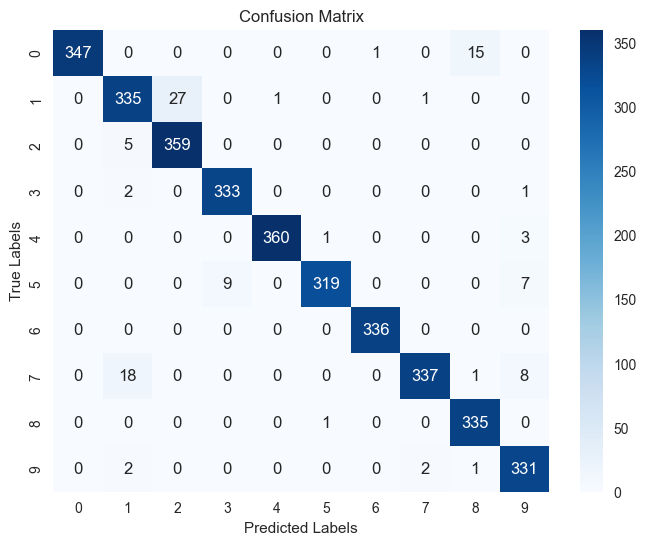

In [26]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_df['Class'], predictions_test['prediction_label'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ROC Curve:

The ROC Curve illustrates the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).

- `fpr`, `tpr`, and `thresholds` are calculated using the `roc_curve()` function. 
- `fpr` (False Positive Rate) and `tpr` (True Positive Rate) are then used to plot the ROC Curve.
- The area under the ROC Curve (AUC) is calculated using the `auc()` function.
- The ROC Curve is plotted using `plt.plot()` with the specified parameters: color, line width, label, etc.
- The diagonal line (representing random guessing) is plotted using `plt.plot()` with specific parameters: color, line style, etc.
- Axes limits and labels are set using `plt.xlim()`, `plt.ylim()`, `plt.xlabel()`, and `plt.ylabel()`.
- The title and legend are added using `plt.title()` and `plt.legend()`.
- Finally, `plt.show()` is used to display the ROC Curve.


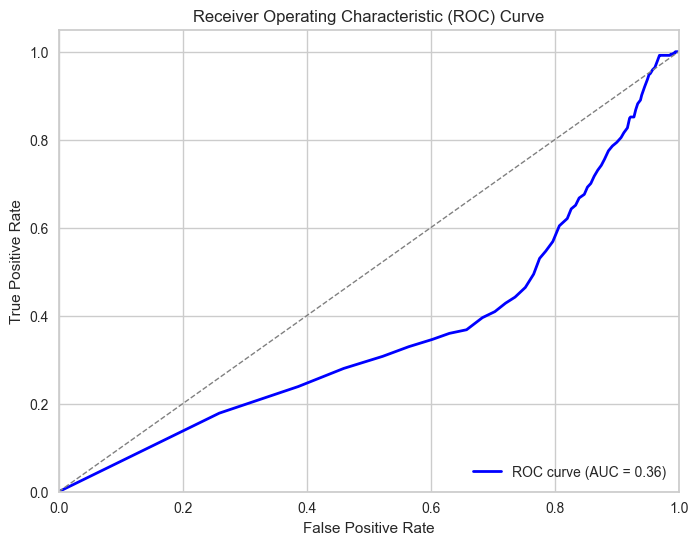

In [21]:
# ROC Curve -  illustrates the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity).

fpr, tpr, thresholds = roc_curve(test_df['Class'], predictions_test['prediction_score'], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Class Distribution of Predictions:

This plot displays the distribution of the predicted classes. 

- A countplot is created using `sns.countplot()` to visualize the distribution of the predicted class labels.
- The predicted class labels are extracted from the `predictions_test` DataFrame and plotted along the x-axis.
- The color palette 'Blues' is specified to style the plot.
- Axes labels (`plt.xlabel()` and `plt.ylabel()`), as well as the plot title (`plt.title()`), are added for clarity.
- Finally, `plt.show()` is used to display the plot.


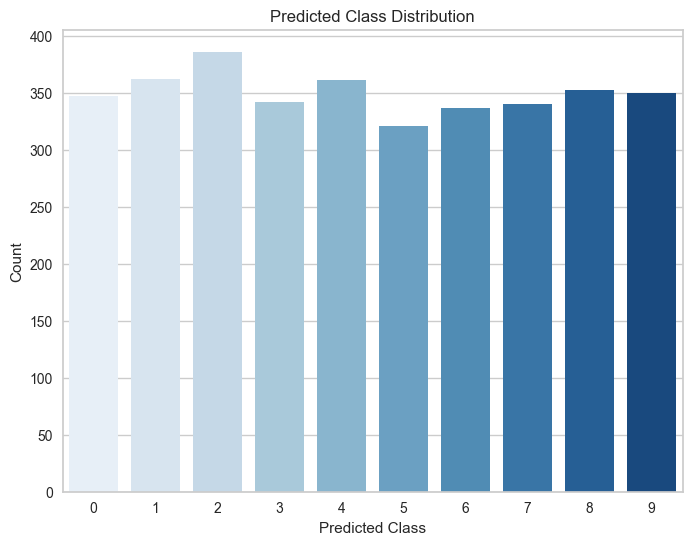

In [22]:
# Class Distribution of Predictions - A simple plot showing the distribution of the predicted class
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions_test['prediction_label'], palette='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Predicted Class Distribution')
plt.show()

Saving the Model:
- A model is saved using `save_model` to use it later on the unseen data which might be present in the futureining.

In [25]:
from pycaret.classification import save_model

# Save the model to use it later
save_model(best_model, 'best_model_pendigits')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Attribute1', 'Attribute2',
                                              'Attribute3', 'Attribute4',
                                              'Attribute5', 'Attribute6',
                                              'Attribute7', 'Attribute8',
                                              'Attribute9', 'Attribute10',
                                              'Attribute11', 'Attribute12',
                                              'Attribute13', 'Attribute14',
                                              'Attribute15', 'Attribute16'],
                                     transformer=SimpleImputer(a...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, 